# Traffic Accident Prediction

This notebook is extra CRISPy used for the Capstone Project for IBM DS Pro Certificate.  It covers -

* Business Understanding: The initial phase is to understand the project's objective from the business or application perspective. Then, you need to translate this knowledge into a machine learning problem with a preliminary plan to achieve the objectives. 
* Data understanding:  In this phase, you need to collect or extract the dataset from various sources such as csv file or SQL database. Then, you need to determine the attributes (columns) that you will use to train your machine learning model. Also, you will assess the condition of chosen attributes by looking for trends, certain patterns, skewed information, correlations, and so on. 
* Data Preparation:  The data preparation includes all the required activities to construct the final dataset which will be fed into the modeling tools. Data preparation can be performed multiple times and it includes balancing the labeled data, transformation, filling missing data, and cleaning the dataset. 
* Modeling:  In this phase, various algorithms and methods can be selected and applied to build the model including supervised machine learning techniques. You can select SVM, XGBoost, decision tree, or any other techniques. You can select a single or multiple machine learning models for the same data mining problem. At this phase, stepping back to the data preparation phase is often required. 
* Evaluation:  Before proceeding to the deployment stage, the model needs to be evaluated thoroughly to ensure that the business or the applications' objectives are achieved. Certain metrics can be used for the model evaluation such as accuracy, recall, F1-score, precision, and others. 
* Deployment: The deployment phase requirements vary from project to project. It can be as simple as creating a report, developing interactive visualization, or making the machine learning model available in the production environment. In this environment, the customers or end-users can utilize the model in different ways such as API, website, or so on.


# Business Understanding

TODO - Merge BU section

In [57]:
import pandas as pd
import types
import itertools
import numpy as np

from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
%matplotlib inline

# Data Understanding

TODO - Merge DU section

# Data Preparation

In [2]:
# Read data file from Coursera, not SDOT.  Low memory suppresses warning when loading file, does nothing else
df = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv",\
                low_memory = False)
print('File downloaded')

File downloaded


In [3]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [5]:
#removing the duplicates
print('Original Data Shape :', df.shape)
df1 = df.drop_duplicates()
print('Unique Data Shape :',df1.shape)

Original Data Shape : (194673, 38)
Unique Data Shape : (194673, 38)


In [6]:
#checking the count of missing records
null_counts = df.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

PEDROWNOTGRNT     190006
EXCEPTRSNDESC     189035
SPEEDING          185340
INATTENTIONIND    164868
INTKEY            129603
EXCEPTRSNCODE     109862
SDOTCOLNUM         79737
JUNCTIONTYPE        6329
Y                   5334
X                   5334
LIGHTCOND           5170
WEATHER             5081
ROADCOND            5012
COLLISIONTYPE       4904
ST_COLDESC          4904
UNDERINFL           4884
LOCATION            2677
ADDRTYPE            1926
ST_COLCODE            18
dtype: int64

In [7]:
#checking the count of not null values
not_null_counts = df.notnull().sum()
not_null_counts[not_null_counts > 0].sort_values(ascending=False)

HITPARKEDCAR      194673
INCDTTM           194673
OBJECTID          194673
INCKEY            194673
COLDETKEY         194673
REPORTNO          194673
STATUS            194673
SEVERITYCODE.1    194673
SEVERITYDESC      194673
PERSONCOUNT       194673
PEDCOUNT          194673
CROSSWALKKEY      194673
VEHCOUNT          194673
INCDATE           194673
PEDCYLCOUNT       194673
SEVERITYCODE      194673
SDOT_COLDESC      194673
SEGLANEKEY        194673
SDOT_COLCODE      194673
ST_COLCODE        194655
ADDRTYPE          192747
LOCATION          191996
UNDERINFL         189789
COLLISIONTYPE     189769
ST_COLDESC        189769
ROADCOND          189661
WEATHER           189592
LIGHTCOND         189503
X                 189339
Y                 189339
JUNCTIONTYPE      188344
SDOTCOLNUM        114936
EXCEPTRSNCODE      84811
INTKEY             65070
INATTENTIONIND     29805
SPEEDING            9333
EXCEPTRSNDESC       5638
PEDROWNOTGRNT       4667
dtype: int64

In [8]:
df['INCDATE_1'] = pd.to_datetime(df['INCDATE'])
df['YEAR'] = df['INCDATE_1'].dt.year
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,INCDATE_1,YEAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,NaN,NaN,NaN,10,Entering at angle,0,0,N,2013-03-27 00:00:00+00:00,2013
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N,2006-12-20 00:00:00+00:00,2006
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N,2004-11-18 00:00:00+00:00,2004
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,NaN,NaN,NaN,23,From same direction - all others,0,0,N,2013-03-29 00:00:00+00:00,2013
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,NaN,4028032.0,NaN,10,Entering at angle,0,0,N,2004-01-28 00:00:00+00:00,2004


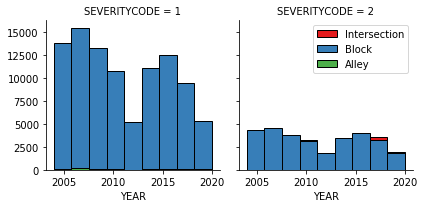

In [10]:
# Chart severity based on yearly collision address type
bins = np.linspace(df.YEAR.min(), df.YEAR.max(), 10)
g = sns.FacetGrid(df, col="SEVERITYCODE", hue="ADDRTYPE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'YEAR', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

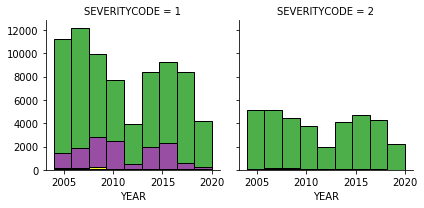

In [13]:
# Chart severity based on yearly weather
bins = np.linspace(df.YEAR.min(), df.YEAR.max(), 10)
g = sns.FacetGrid(df, col="SEVERITYCODE", hue="WEATHER", palette="Set1", col_wrap=2)
g.map(plt.hist, 'YEAR', bins=bins, ec="k")
#g.axes[-1].legend()
plt.show()

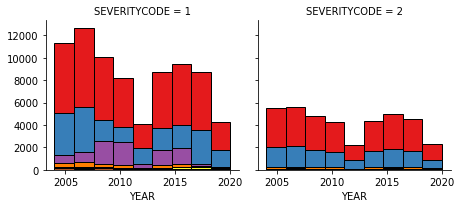

In [14]:
# Chart severity based on yearly light conditions
bins = np.linspace(df.YEAR.min(), df.YEAR.max(), 10)
g = sns.FacetGrid(df, col="SEVERITYCODE", hue="LIGHTCOND", palette="Set1", col_wrap=10)
g.map(plt.hist, 'YEAR', bins=bins, ec="k")
#g.axes[-1].legend(loc='right')
plt.show()

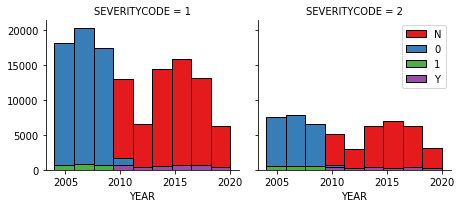

In [15]:
# Chart severity based on yearly under the influence indicator
bins = np.linspace(df.YEAR.min(), df.YEAR.max(), 10)
g = sns.FacetGrid(df, col="SEVERITYCODE", hue="UNDERINFL", palette="Set1", col_wrap=10)
g.map(plt.hist, 'YEAR', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [16]:
df.groupby(['SEVERITYCODE'])['COLLISIONTYPE'].value_counts(normalize = True)

SEVERITYCODE  COLLISIONTYPE
1             Parked Car       0.341761
              Angles           0.158722
              Rear Ended       0.146424
              Other            0.132640
              Sideswipe        0.121420
              Left Turn        0.062524
              Right Turn       0.017697
              Head On          0.008686
              Pedestrian       0.005067
              Cycles           0.005059
2             Rear Ended       0.256724
              Angles           0.238403
              Other            0.106952
              Pedestrian       0.103872
              Left Turn        0.094686
              Cycles           0.083014
              Parked Car       0.046582
              Sideswipe        0.043852
              Head On          0.015259
              Right Turn       0.010657
Name: COLLISIONTYPE, dtype: float64

In [19]:
# Swap in numbers where applicable

df['INCDTTM_1'] = df['INCDTTM'].astype("datetime64[ns]").dt.dayofweek.apply(lambda x: 1 if (x>3)  else 0)
df['SDOT_COLCODE_1'] = df['SDOT_COLCODE'].fillna('0.0').astype('float64')
df['HITPARKEDCAR_1'] = df['HITPARKEDCAR'].fillna('N').replace(['N','Y'],['0','1']).astype('float64')
df['UNDERINFL_1'] = df['UNDERINFL'].fillna('0').replace(['N','Y'],['0','1']).astype('float64')


df['WEATHER_1'] = \
df['WEATHER'].fillna('Unknown').replace(\
                                        ['Blowing Sand/Dirt', 'Blowing Snow', 'Clear', 'Fog/Smog/Smoke',\
                                         'Other', 'Overcast', 'Partly Cloudy', 'Raining', 'Severe Crosswind',\
                                         'Sleet/Hail/Freezing Rain', 'Snowing', 'Unknown'],\
                                        ['0','1','2','3','4','5','6','7','8','9','10','11']).astype('float64')

df['LIGHTCOND_1'] = \
df['LIGHTCOND'].fillna('Unknown').replace(\
                                          ['Dark - No Street Lights', 'Dark - Street Lights Off',\
                                           'Dark - Street Lights On', 'Dark - Unknown Lighting', 'Dawn',\
                                           'Daylight', 'Dusk', 'Other', 'Unknown'],\
                                          ['0','1','2','3','4','5','6','7','8']).astype('float64')
df['ROADCOND_1'] = \
df['ROADCOND'].fillna('Unknown').replace(\
                                         ['Dry', 'Ice', 'Oil', 'Other', 'Sand/Mud/Dirt', 'Snow/Slush',\
                                          'Standing Water', 'Unknown', 'Wet'],\
                                         ['0','1','2','3','4','5','6','7','8']).astype('float64')
df['ADDRTYPE_1'] = \
df['ADDRTYPE'].fillna('Block').replace(\
                                       ['Alley', 'Block', 'Intersection'], ['0', '1', '2']).astype('float64')

df['COLLISIONTYPE_1'] = \
df['COLLISIONTYPE'].fillna('Other').replace(\
                                            ['Angles','Cycles','Head On', 'Left Turn', 'Other', 'Parked Car',\
                                             'Pedestrian', 'Rear Ended', 'Right Turn', 'Sideswipe'],\
                                            ['0','1','2','3','4','5','6','7','8','9']).astype('float64')

In [20]:
Feature = df[['ADDRTYPE_1','COLLISIONTYPE_1','LIGHTCOND_1','ROADCOND_1','WEATHER_1','SDOT_COLCODE_1',\
              'UNDERINFL_1','HITPARKEDCAR_1','INCDTTM_1','SEVERITYCODE' ]]
Feature.head()

,ADDRTYPE_1,COLLISIONTYPE_1,LIGHTCOND_1,ROADCOND_1,WEATHER_1,SDOT_COLCODE_1,UNDERINFL_1,HITPARKEDCAR_1,INCDTTM_1,SEVERITYCODE
0,2.0,0.0,5.0,8.0,5.0,11.0,0.0,0.0,0,2
1,1.0,9.0,2.0,8.0,7.0,16.0,0.0,0.0,0,1
2,1.0,5.0,5.0,0.0,5.0,14.0,0.0,0.0,0,1
3,1.0,4.0,5.0,0.0,2.0,11.0,0.0,0.0,1,1
4,2.0,0.0,5.0,8.0,7.0,11.0,0.0,0.0,0,2


In [21]:
#print('Shape before dropping nan values:', Feature.shape)
#Feature.dropna(inplace = True)
#print('Shape after dropping nan values:', Feature.shape)

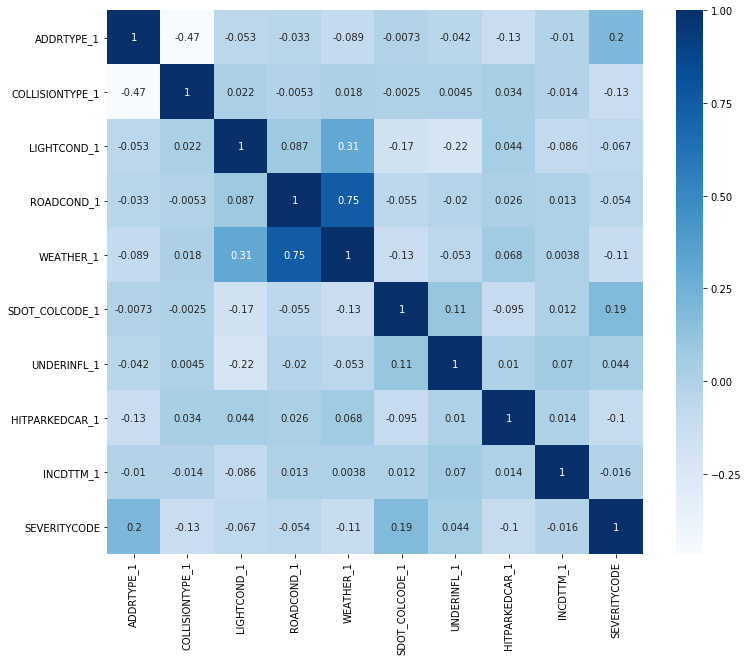

In [22]:
plt.figure(figsize=(12,10))
cor = Feature.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

# Modeling

In [23]:
Feature1 = df[['ADDRTYPE_1', 'COLLISIONTYPE_1', 'LIGHTCOND_1', 'ROADCOND_1', 'WEATHER_1', 'SDOT_COLCODE_1',\
               'UNDERINFL_1', 'HITPARKEDCAR_1', 'INCDTTM_1']]

In [26]:
X=Feature1
X[0:5]

,ADDRTYPE_1,COLLISIONTYPE_1,LIGHTCOND_1,ROADCOND_1,WEATHER_1,SDOT_COLCODE_1,UNDERINFL_1,HITPARKEDCAR_1,INCDTTM_1
0,2.0,0.0,5.0,8.0,5.0,11.0,0.0,0.0,0
1,1.0,9.0,2.0,8.0,7.0,16.0,0.0,0.0,0
2,1.0,5.0,5.0,0.0,5.0,14.0,0.0,0.0,0
3,1.0,4.0,5.0,0.0,2.0,11.0,0.0,0.0,1
4,2.0,0.0,5.0,8.0,7.0,11.0,0.0,0.0,0


In [27]:
y = df['SEVERITYCODE'].values
y[0:5]

array([2, 1, 1, 1, 2])

In [28]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 1.39942178, -1.63329265,  0.28232455,  1.4403421 ,  0.24318799,
        -0.41751024, -0.2217116 , -0.19619929, -0.85019462],
       [-0.69049979,  1.6395935 , -1.39630003,  1.4403421 ,  0.9040864 ,
         0.31042563, -0.2217116 , -0.19619929, -0.85019462],
       [-0.69049979,  0.18497743,  0.28232455, -0.73914132,  0.24318799,
         0.01925128, -0.2217116 , -0.19619929, -0.85019462],
       [-0.69049979, -0.17867658,  0.28232455, -0.73914132, -0.74815962,
        -0.41751024, -0.2217116 , -0.19619929,  1.17620128],
       [ 1.39942178, -1.63329265,  0.28232455,  1.4403421 ,  0.9040864 ,
        -0.41751024, -0.2217116 , -0.19619929, -0.85019462]])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train Set:', X_train.shape,  y_train.shape)
print ('Test Set:', X_test.shape,  y_test.shape)

Train Set: (155738, 9) (155738,)
Test Set: (38935, 9) (38935,)


## k-Nearest Neighbors

In [32]:
#Ks = 15
Ks = 2
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1, Ks):
    print("K -", n)
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat_KNN = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat_KNN)
    std_acc[n-1] = np.std(yhat_KNN == y_test) / np.sqrt(yhat_KNN.shape[0])
mean_acc


K - 1


array([0.62583794])

In [33]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax() + 1)

The best accuracy was with 0.6258379350199049 with k= 1


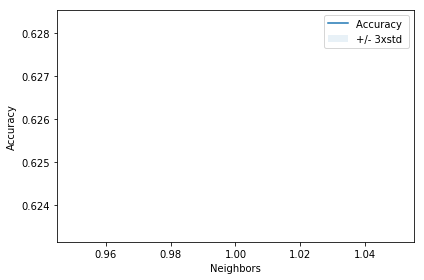

In [34]:
plt.plot(range(1, Ks),mean_acc)
plt.fill_between(range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Neighbors')
plt.tight_layout()
plt.show()

In [35]:
#k = mean_acc.argmax() + 1
k = 1
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat_KNN = neigh.predict(X_test)
yhat_KNN[0:5]

array([1, 1, 1, 2, 1])

In [38]:
# Summary
print("Train Set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test Set Accuracy: ", metrics.accuracy_score(y_test, yhat_KNN))
print (classification_report(y_test, yhat_KNN))

Train Set Accuracy:  0.6421425727824936
Test Set Accuracy:  0.6258379350199049
              precision    recall  f1-score   support

           1       0.78      0.65      0.71     27425
           2       0.40      0.56      0.47     11510

   micro avg       0.63      0.63      0.63     38935
   macro avg       0.59      0.61      0.59     38935
weighted avg       0.67      0.63      0.64     38935



In [39]:
f1_score(y_test, yhat_KNN, average = 'weighted')

0.6397673178824385

In [40]:
jaccard_similarity_score(y_test, yhat_KNN)

0.6258379350199049

## Decision Tree

In [41]:
incidentTree  = DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
incidentTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
incidentTree.fit(X_train,y_train)
yhat = incidentTree.predict(X_test)

In [46]:
# Summary
print("Train Set Accuracy: ", metrics.accuracy_score(y_train, incidentTree.predict(X_train)))
print("Test Set Accuracy: ", metrics.accuracy_score(y_test, yhat))
print (classification_report(y_test, yhat))

Train Set Accuracy:  0.7472293210391812
Test Set Accuracy:  0.7518171311159625
              precision    recall  f1-score   support

           1       0.74      0.99      0.85     27425
           2       0.89      0.18      0.30     11510

   micro avg       0.75      0.75      0.75     38935
   macro avg       0.82      0.59      0.58     38935
weighted avg       0.79      0.75      0.69     38935



In [47]:
#!conda install -c conda-forge python-graphviz -y
#!conda install -c conda-forge pydotplus -y

In [48]:
from sklearn.externals.six import StringIO
#import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
# %matplotlib inline

In [50]:
dot_data = StringIO()
filename = "accident_tree.png"
#featureNames = Feature1.columns[0:9]
#len(featureNames)
#targetNames = df["SEVERITYCODE"].unique().tolist()
#out=tree.export_graphviz(incidentTree, out_file = dot_data, feature_names = featureNames, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)
#out = tree.export_graphviz(incidentTree, out_file = dot_data, feature_names = featureNames, filled = True,\
#                           special_characters = True, rotate = False)
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png(filename)
#img = mpimg.imread(filename)
#plt.figure(figsize = (100, 200))
#plt.imshow(img,interpolation = 'nearest')

## Logistic Regression

In [51]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
yhat = LR.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1])

In [53]:
# Summary
print("Train Set Accuracy: ", metrics.accuracy_score(y_train, LR.predict(X_train)))
print("Test Set Accuracy: ", metrics.accuracy_score(y_test, yhat))
print (classification_report(y_test, yhat))

Train Set Accuracy:  0.7225853677329874
Test Set Accuracy:  0.7256709901117246
              precision    recall  f1-score   support

           1       0.73      0.97      0.83     27425
           2       0.66      0.15      0.24     11510

   micro avg       0.73      0.73      0.73     38935
   macro avg       0.69      0.56      0.54     38935
weighted avg       0.71      0.73      0.66     38935



In [54]:
f1_score(y_test, yhat, average='weighted')

0.6585175565700814

In [55]:
jaccard_similarity_score(y_test, yhat)

0.7256709901117246

In [58]:
yhat_prob = LR.predict_proba(X_test)
#yhat_prob
log_loss(y_test, yhat_prob)

0.5620918339427591

## SVM

In [59]:
oe = OrdinalEncoder().fit(X)
le = LabelEncoder().fit(y)

X_train_svm = oe.transform(X_train)
X_test_svm = oe.transform(X_test)

y_train_svm = le.transform(y_train)
y_test_svm = le.transform(y_test)

In [ ]:
svm = svm.SVC(kernel='rbf', gamma='auto')
svm.fit(X_train_svm, y_train_svm)

In [ ]:
#yhat = clf.predict(X_test_svm)
#yhat [0:5]

In [ ]:
# Summary
#print("Train Set Accuracy: ", metrics.accuracy_score(y_train_svm, svm.predict(X_train_svm)))
#print("Test Set Accuracy: ", metrics.accuracy_score(y_test_svm, yhat))
#print (classification_report(y_test_svm, yhat))

In [ ]:
#f1_score(y_test_svm, yhat, average='weighted')

In [ ]:
#jaccard_similarity_score(y_test_svm, yhat)